In [192]:
import pandas as pd
import json 
import json
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [244]:
df = pd.read_csv('init_node_7.csv')
df.head()

Unnamed: 0  sentence                                              cause  \
0           0         7   continuing research our knowledge of the root...   
1           1        41               improved knowledge of the microbiota   
2           2       261                 the rbcs contract when polymerized   
3           3       263   high - speed cavity preparation without a wat...   
4           4       303   develops , defense cells , such as natural ki...   

                                              effect  \
0   dedicated strategies to manage the different ...   
1   dedicated strategies for managing different t...   
2   a microscopic gap to occur between the resin ...   
3   significantly more pulp damage than when a wa...   
4   increased proinflammatory signalling and cell...   

                                                enta  \
0  [{'ent': 'continuing research', 'indx': 243, '...   
1  [{'ent': 'improved knowledge', 'indx': 551, 's...   
2  [{'ent': 'rbcs contract', 'indx': 1002, 'smi':...   
3  [{'ent': 'speed cavity preparation', 'indx': 1...   
4  [{'ent': 'defense cells', 'indx': 290, 'smi': ...   

                                                entb  
0  [{'ent': 'dedicated strategies', 'indx': 287, ...  
1  [{'ent': 'dedicated strategies', 'indx': 287, ...  
2  [{'ent': 'microscopic gap', 'indx': 725, 'smi'...  
3  [{'ent': 'pulp damage', 'indx': 945, 'smi': 1....  
4  [{'ent': 'increased proinflammatory signalling...

In [245]:
entities = pd.read_csv("notebooks_entities_v1.csv", names=['key', 'entity'])

entities.head()

ent_dict = {}
for index, row in entities.iterrows():
    ent_dict[row['key']] = row['entity'] 


In [246]:
edges = []
node_set = set()
for index, row in df.iterrows():
    cuzz =row['enta'].replace('False', '')
    cuzz = cuzz.replace(', ]', ']')
    eff = row['entb'].replace('False', '')
    eff = eff.replace(', ]', ']')
#     print(cuzz)
    cause = json.loads(cuzz.replace("'", '"'))
    effect = json.loads(eff.replace("'", '"'))
#     print(cause[0]['indx'], effect)
    
    
#     edge
    for c in cause:
        for e in effect:
            a = c['indx']
            b = e['indx']
            edges.append((a,b, 1))
            node_set.add(a)
            node_set.add(b)




JSONDecodeError: Expecting value: line 1 column 2 (char 1)

In [247]:
# [(53,
#   {'name': 'Bangkae',
#    'index': '53',
#    'id': 'BL37',
#    'type': 'mrt',
#    'line': 'B'}),
node_set
nodes = []
from random import randrange
for node in node_set:
    ent = {}
    ran = randrange(4)
    print(node)
    ent['name'] = ent_dict[node]
    ent['index'] = node
    ent['id'] = node
    ent['type'] = ['mrt', 'bts', 'mrt', 'bts'][ran]
    ent['line'] = ['B', 'S', 'N', 'E'][ran]
    nodes.append((node, ent))

96
193
290
547
551
1002
1164
878
945
1169
243
725
58
1340
573
287


In [248]:
from networkx.readwrite import json_graph
def plot_graph(node, edge, name, size=12):

    fig = plt.figure(figsize=(size,size))
    ax = plt.subplot(111)
    ax.set_title('Graph - Shapes', fontsize=10)
    G = nx.DiGraph([])
    list(G.edges)
    opts = { "with_labels": True }



    G.add_nodes_from(
        node
    )




    #map line to color

    color_line = {'S': 'green', 'N':'red', 'E':'blue', 'W': 'navy', 'C': 'yellow', 'B': 'turquoise', 'P': 'indigo'}


    station_colors = [color_line[nx.get_node_attributes(G, 'line')[node]] for node in G]

    G.add_weighted_edges_from(edge)


    nx.draw(G, **opts,labels=name,node_color=station_colors)


    plt.show()
    plt.savefig("Graph.png", format="PNG")
    return G

In [249]:
new_ent_dict = {}

for x in nodes:
    new_ent_dict[x[0]] = ent_dict[x[0]]

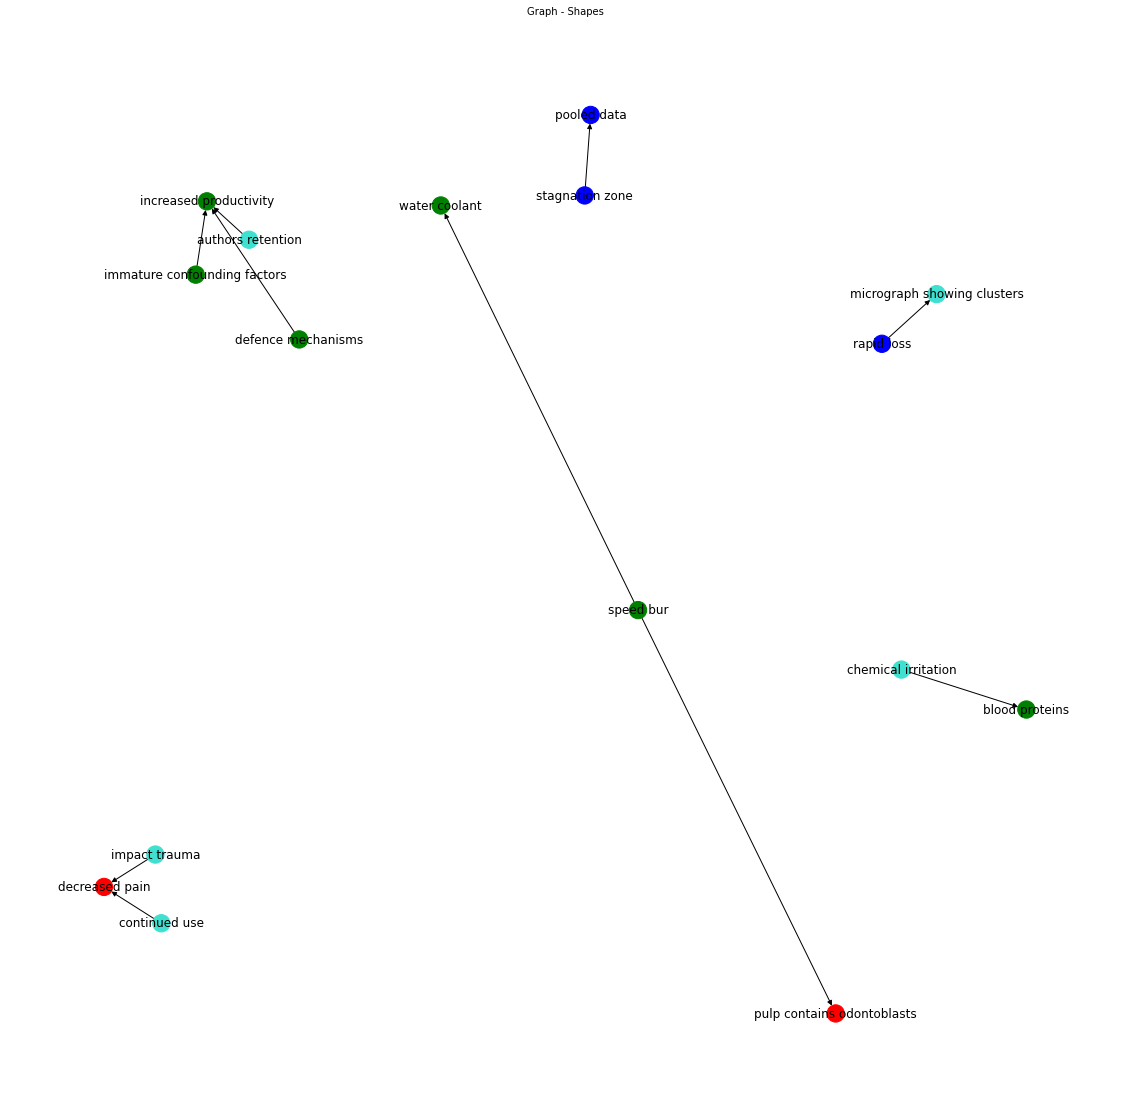

<Figure size 432x288 with 0 Axes>

In [250]:
DG = plot_graph(nodes, edges, new_ent_dict, 20)




In [241]:
import networkx as nx
from networkx.readwrite import json_graph

text = json_graph.node_link_data(DG)

In [242]:
json.dumps(text)

'{"directed": true, "multigraph": false, "graph": {}, "nodes": [{"name": "access preparation", "index": 5, "id": 5, "type": "mrt", "line": "N"}, {"name": "predisposing factor", "index": 894, "id": 894, "type": "mrt", "line": "B"}, {"name": "resin volume", "index": 1047, "id": 1047, "type": "mrt", "line": "N"}, {"name": "localized hemorrhage", "index": 673, "id": 673, "type": "mrt", "line": "B"}, {"name": "improvement decrease", "index": 553, "id": 553, "type": "mrt", "line": "B"}, {"name": "cell studies", "index": 174, "id": 174, "type": "bts", "line": "E"}, {"name": "filled teeth", "index": 433, "id": 433, "type": "mrt", "line": "N"}, {"name": "pulp floor map", "index": 949, "id": 949, "type": "mrt", "line": "B"}, {"name": "pulp morphology", "index": 952, "id": 952, "type": "bts", "line": "S"}, {"name": "root dimensions", "index": 1080, "id": 1080, "type": "bts", "line": "S"}, {"name": "warrant express", "index": 1339, "id": 1339, "type": "mrt", "line": "B"}, {"name": "root fracture",

In [243]:
text = json.dumps(ent_dict).replace("'", '"')
print(text)

{"1": "abnormal stimuli", "2": "abutment teeth", "3": "access cavities", "4": "access cavity", "5": "access preparation", "6": "access preparations limit instrument", "7": "accessory canals", "8": "accurate pulpal", "9": "achieve patency", "10": "acronym slob", "11": "acting agents", "12": "acute liver failure", "13": "acute symptoms", "14": "addition silver points corrode", "15": "administration time", "16": "adult patient", "17": "adult teeth", "18": "advancing age", "19": "advancing caries", "20": "advancing lesion host responses", "21": "afferent nerve fibers", "22": "aged pulps", "23": "aggregatibacter actinomycetemcomitans viability", "24": "aging patients", "25": "air blasts", "26": "airway response", "27": "alter color", "28": "altered function", "29": "alternating pressures", "30": "alveolar bone", "31": "amalgam particles", "32": "amount", "33": "analysis correction", "34": "anatomy continuity", "35": "anatomy following trepanation", "36": "anatomy use", "37": "anesthesia app